<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220622_ML10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy # 난수 생성기를 사용하기 위해서

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor # 회귀
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

# wine 데이터 셋

In [ ]:
wine_csv = 'https://bit.ly/wine_csv_data'
wine = pd.read_csv(wine_csv)

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine['class'].value_counts()
# 0 : red wine / 1 : white wine

1.0    4898
0.0    1599
Name: class, dtype: int64

# train/test split

In [ ]:
X = wine.iloc[:, :3].values.copy()
y = wine['class'].values.astype('int').copy()

In [ ]:
X[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [ ]:
# Decision Tree(결정 트리)를 시각화하기 위해 필요한 이름들
feature_names = wine.columns[:3]
print(feature_names)
target_names = ['red', 'white']
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


# Decision Tree Classification

In [ ]:
# 모델 생성
tree_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# 모델 훈련
tree_clf.fit(X_tr, y_tr)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 훈련 셋 예측값, confusion matrix
tr_pred = tree_clf.predict(X_tr)
confusion_matrix(y_tr, tr_pred)

array([[1276,    3],
       [   8, 3910]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=target_names))

              precision    recall  f1-score   support

         red       0.99      1.00      1.00      1279
       white       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



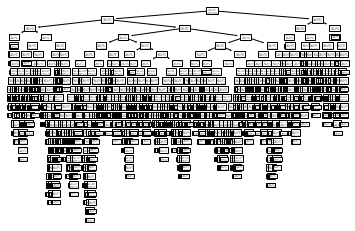

In [ ]:
# decision tree 알고리즘을 훈련 데이터로 학습시키면 tree가 만들어짐.
plot_tree(tree_clf)
plt.show()

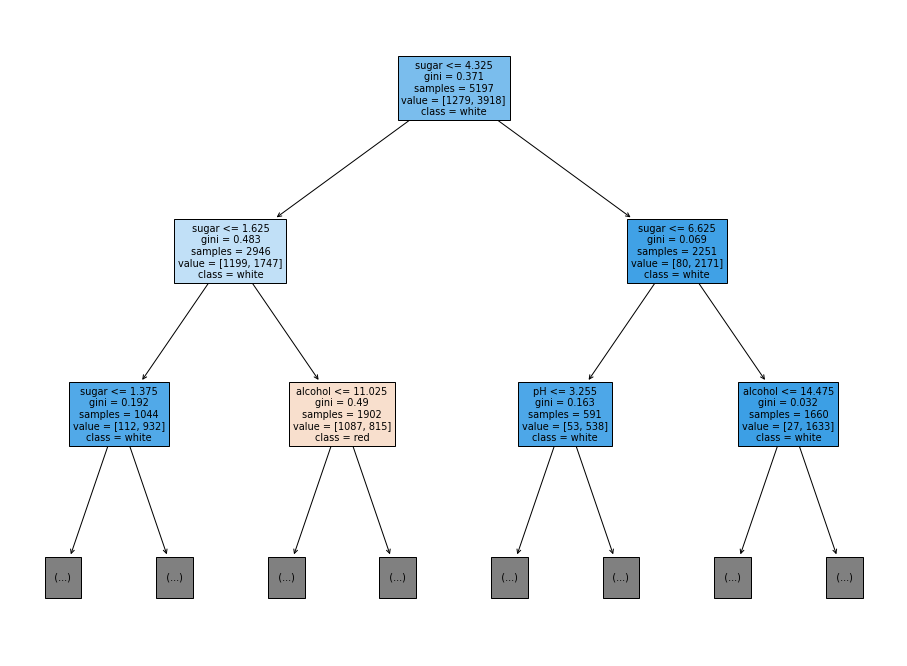

In [ ]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2, 
          feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

#> gini : 불순도
#> filled : 순수해질수록(gini가 더 작아질수록) 더 진한 색깔

In [ ]:
# sugar <= 6.625에서 gini 값
1 - ((80/2251) ** 2 + (2171/2251) ** 2)

0.06855337111636661

In [ ]:
# 테스트 셋 예측값, confusion matrix
te_pred = tree_clf.predict(X_te)
confusion_matrix(y_te, te_pred)

array([[226,  94],
       [ 81, 899]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=target_names))
# train acc : 1.0, test acc : 0.87 ⇒ overfitting

              precision    recall  f1-score   support

         red       0.74      0.71      0.72       320
       white       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



Decision Tree를 나누는 기준 :

* __Gini impurity(불순도)__
$$
Gini = 1 - \sum_i {p_i}^2
$$

    * ${p_i}$ : $i$번째 클래스가 될 확률
    * 이진(binary class) 분류
        * gini = $1 - ((양성 클래스 확률)^2 + (음성 클래스 확률)^2)$
        * 양성과 음성의 비율이 1:1인 경우, gini = $1 - (0.5^2 + 0.5^2) = 0.5$. 불순도 최대.
        * 양성 또는 음성으로 완벽하게 분류된 경우, gini = $1 - (0^2 + 1^2) = 0$. 불순도 최소.

* __Entropy(엔트로피)__
$$
Entropy = - \sum_i p_i \log_k (p_i)
$$

    * $k$ : 클래스의 개수(이진 분류인 경우, k=2).
    * $p_i$ : $i$번째 클래스가 될 확률.
    * 이진 분류
        * 양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
        * 양성 또는 음성으로 완벽하게 분류된 경우, Entropy = 0. 엔트로피 최소.
    * Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성.

# Decision Tree의 특징

* 장점 :
    * 특성들을 스케일링할 필요가 없다.
    * 결과를 이해하기 쉽다.

* 단점 :
    * 과적합(overfitting)되기가 쉽다.
    * 여러가지 규제들을 적용해서 과적합 문제들 해결해야 함.

* 규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    * `max_depth` : decision tree의 최대 깊이.
    * `max_leaf_node` : leaf node의 최댓값.
    * `max_features` : 각 노드에서 분할에 사용할 특성의 최대 개수.
    * `min_samples_split` : 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    * `min_samples_leaf` : leaf 노드가 가져야 할 최소 샘플 개수.
    * `max_`로 시작하는 파라미터의 값을 증가시키면 트리의 크기가 커짐.
        * ⇒ 규제가 작아짐.
        * ⇒ overfitting이 커짐.
    * `max_`로 시작하는 파라미터의 값을 감소시키면 트리의 크기가 작아지기 때문에 overfitting이 작아짐.
    * `min_`으로 시작하는 파라미터의 값을 증가시키면 트리의 크기가 작아짐.


# Hyperparameter 튜닝

## `min_samples_split`

In [ ]:
# 모델 생성
# min_samples_split=0.2 : 전체 훈련 샘플의 20% 이상인 경우 node를 나눔.
tree_clf2 = DecisionTreeClassifier(min_samples_split=0.2,
                                   random_state=42)

# 모델 훈련
tree_clf2.fit(X_tr, y_tr)

# 훈련/테스트 셋 예측값
print('Train acc :', tree_clf2.score(X_tr, y_tr))
print('Test acc :', tree_clf2.score(X_te, y_te))

Train acc : 0.8458726188185491
Test acc : 0.8407692307692308


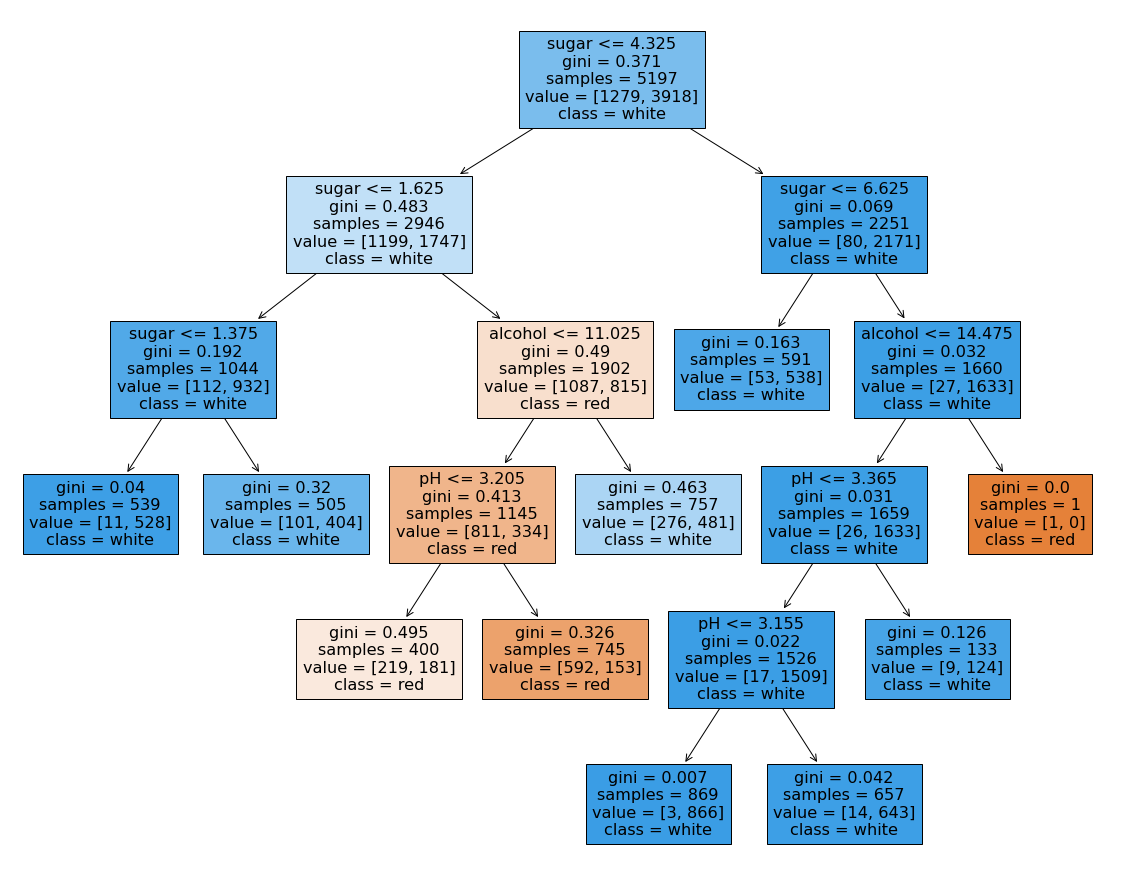

In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(tree_clf2, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

# 하이퍼파라미터 튜닝 과정

* 전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
* 하이퍼파라미터를 변화시키면서 훈련 셋으로 모델을 훈련(fit).
* 하이퍼파라미터 설정에 따른 성능 테스트는 검증 셋으로 검증.
    * 검증 셋에서 가장 좋은 파라미터를 선택.
* 튜닝이 끝난 모델의 일반화 성능을 예측하기 위한 용도로만 테스트 셋을 사용!

In [ ]:
# 전체 데이터 셋을 훈련 셋과 테스트 셋으로 분리
X_tr_full, X_te, y_tr_full, y_te = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
X_tr_full.shape, X_te.shape

((5197, 3), (1300, 3))

In [ ]:
# 전체 훈련 셋을 다시 훈련 셋과 검증 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_full)

In [ ]:
X_tr.shape, X_val.shape

((4157, 3), (1040, 3))

`max_depth`의 변화에 따른 정확도의 변화

Train acc : [0.754, 0.827, 0.827, 0.864, 0.869, 0.878, 0.889, 0.899, 0.911, 0.931, 0.945, 0.955, 0.969, 0.982, 0.986, 0.99, 0.994, 0.996, 0.998, 0.998]
Validation acc : [0.754, 0.83, 0.83, 0.864, 0.875, 0.868, 0.862, 0.864, 0.857, 0.859, 0.858, 0.861, 0.871, 0.873, 0.871, 0.87, 0.876, 0.874, 0.873, 0.874]


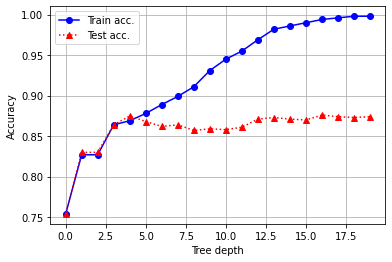

In [ ]:
# 정확도를 저장할 리스트 생성(훈련 셋, 검증 셋)
tr_acc = []
val_acc = []
# max_depth를 1 ~ 20 변화시키면서 반복
for i in range(1, 21):
    # decision tree를 생성, 훈련, 훈련/검증 정확도 계산 → 리스트에 추가
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree_clf.fit(X_tr, y_tr)
    tr_acc.append(round(tree_clf.score(X_tr, y_tr), 3))
    val_acc.append(round(tree_clf.score(X_val, y_val), 3))

# 출력
print("Train acc :", tr_acc)
print("Validation acc :", val_acc)

# 선 그래프
plt.plot(tr_acc, 'bo-', label='Train acc.')
plt.plot(val_acc, 'r^:', label='Test acc.')
plt.legend()
plt.grid()
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

위 결과를 보면 tree의 max_depth를 5보다 더 키우는 것은 검증 셋의 정확도를 높이지는 못하고 과적합(overfitting)만 더 키우는 결과.

max_depth의 가장 적절한 값은 5. max_depth를 5로 설정하고 훈련시킨 모델에서 일반화 성능이 어떨지 예측하는 것은 테스트 셋으로 예측하면 됨.

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_tr, y_tr)
print('Train score :', tree_clf.score(X_tr, y_tr))
print('Test score :', tree_clf.score(X_te, y_te)) # 일반화 성능

Train score : 0.8691363964397402
Test score : 0.8369230769230769


# 교차 검증(Cross Validation)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
# 교차 검증에서 사용할 예측기(classifier, regressor)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# 5-fold 교차 검증 (default : cv=None → 5-fold)
cv = cross_validate(estimator=clf, X=X_tr_full, y=y_tr_full, n_jobs=-1,
                    return_train_score=True)
cv # dict

{'fit_time': array([0.00662208, 0.00639606, 0.00610757, 0.00594831, 0.00577736]),
 'score_time': array([0.00092936, 0.00095725, 0.0007844 , 0.00077844, 0.00060797]),
 'test_score': array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549]),
 'train_score': array([0.86817416, 0.8708203 , 0.87662338, 0.87638288, 0.87469937])}

In [ ]:
# 교차 검증에서 검증 점수(정확도)
cv['test_score']

array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549])

In [ ]:
np.mean(cv['test_score'])

0.8631863108018065

In [ ]:
# 교차 검증에서 훈련 점수
np.mean(cv['train_score'])

0.8733400189738896

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_tr_full, y_tr_full)
tree_clf.score(X_te, y_te)

#> 교차 검증 점수의 평균은 일반적으로 테스트 셋의 점수와 비슷하거나 약간 좋음.
#> 하이퍼파라미터 튜닝을 할 때 교차 검증 점수를 사용할 수 있음.

0.8576923076923076

In [ ]:
# 교차 검증 점수만 필요할 때
cross_val_score(estimator=DecisionTreeClassifier(max_depth=5),
                X=X_tr_full, y=y_tr_full)

array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549])

## 교차 검증을 이용한 하이퍼 파라미터 튜닝

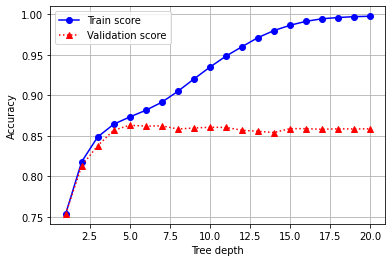

In [ ]:
# 훈련 셋(X_tr_full, y_tr_full), 테스트 셋(X_te, y_te)
tr_scores = []
val_scores = []
max_depths = np.arange(1, 21)
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv = cross_validate(estimator=tree, X=X_tr_full, y=y_tr_full,
                        n_jobs=-1, return_train_score=True)
    tr_scores.append(np.mean(cv['train_score']))
    val_scores.append(np.mean(cv['test_score']))

plt.plot(max_depths, tr_scores, 'bo-', label='Train score')
plt.plot(max_depths, val_scores, 'r^:', label='Validation score')
plt.grid()
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

교차 검증을 통해서 얻은 검증 셋 점수가 가장 좋은 max_depth의 값은 5. 최적의 모델(best model)은 max_depth=5인 Decision Tree.

In [ ]:
best_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
best_tree.fit(X_tr_full, y_tr_full) # 모델 훈련
print('Train score :', best_tree.score(X_tr_full, y_tr_full))
print('Test score :', best_tree.score(X_te, y_te))

Train score : 0.8718491437367712
Test score : 0.8576923076923076


# GridSearchCV를 사용한 하이퍼파라미터 튜닝

In [ ]:
# 훈련 셋, 테스트 셋
X_tr_full.shape, X_te.shape

((5197, 3), (1300, 3))

In [ ]:
# 하이퍼파라미터를 튜닝할 머신 러닝 모델 생성
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
# 튜닝할 하이퍼파라미터 조합을 dict로 생성
# 트리의 max_depth를 1 ~ 20까지 변화
# min_samples_split : 트리에서 노드가 나누어지기 위해 가져야 할 최소 샘플 개수 - 전체 샘플에서의 비율
params = {'max_depth' : np.arange(1, 21),
          'min_samples_split' : [0.01, 0.05, 0.1, 0.15, 0.2]}

In [ ]:
# GridSearchCV를 수행하는 객체 생성
grid_cv = GridSearchCV(estimator=tree, param_grid=params, n_jobs=-1)

In [ ]:
# GridSearchCV를 훈련 셋으로 학습시킴
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': [0.01, 0.05, 0.1, 0.15, 0.2]})

In [ ]:
# Grid Search를 통해서 찾은 가장 테스트 점수가 높은 파라미터 조합
grid_cv.best_params_

{'max_depth': 11, 'min_samples_split': 0.01}

In [ ]:
# Grid Search를 통해서 찾은 가장 좋은 테스트 점수
grid_cv.best_score_

0.8666522914044569

In [ ]:
# Grid Search를 통해서 찾은 가장 점수가 높은 머신 러닝 모델
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=11, min_samples_split=0.01, random_state=42)

In [ ]:
best_tree.score(X_te, y_te)

0.8538461538461538

In [ ]:
# min_samples_split의 값을 0.01 주변으로 다시 설정해서 Grid Search
params = {'max_depth' : np.arange(1, 21),
          'min_samples_split' : np.arange(0.005, 0.015, 0.001)}
grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=params, n_jobs=-1)
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': array([0.005, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.011, 0.012, 0.013,
       0.014])})

In [ ]:
grid_cv.best_params_

{'max_depth': 10, 'min_samples_split': 0.009000000000000001}

In [ ]:
grid_cv.best_score_

0.8670365366106463

In [ ]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=10, min_samples_split=0.009000000000000001,
                       random_state=42)

In [ ]:
# 하이퍼파라미터 튜닝이 모두 끝난 최적의 모델에서 일반화 성능 예측
best_tree.score(X_te, y_te)

0.8584615384615385

# RandomizedSearchCV를 사용한 하이퍼파라미터 튜닝

*  Grid Search : 파라미터들의 조합을 직접 만들어서 CV(교차검증)을 수행.
*  Randomized Search :
    * 파라미터의 조합을 난수로 샘플링할 수 있는 확률 분포 객체를 전달.
    * 파라미터들을 확률분포를 따르는 난수로 생성하여 CV을 수행.

In [ ]:
int_gen = scipy.stats.randint(0, 10)
int_gen # [0, 10) 정수를 균등분포로 만들어내는 난수 생성기

In [ ]:
a = int_gen.rvs(100)
a

array([4, 7, 4, 3, 2, 7, 5, 2, 5, 4, 6, 9, 6, 5, 0, 4, 9, 6, 0, 7, 7, 3,
       7, 4, 2, 4, 4, 9, 3, 0, 9, 6, 0, 0, 2, 4, 7, 7, 8, 2, 3, 3, 5, 6,
       3, 4, 7, 1, 2, 6, 8, 1, 7, 5, 3, 1, 7, 2, 8, 0, 6, 0, 2, 3, 5, 6,
       5, 2, 8, 5, 7, 3, 5, 9, 4, 1, 6, 8, 2, 5, 8, 4, 9, 7, 2, 4, 9, 6,
       6, 9, 3, 0, 0, 7, 1, 0, 7, 4, 4, 6])

In [ ]:
np.unique(a, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10,  5, 11, 10, 14, 10, 12, 14,  6,  8]))

In [ ]:
uniform_gen = scipy.stats.uniform(0, 1)
uniform_gen # [0, 1) 실수를 균등분포로 만들어내는 난수 생성기

In [ ]:
uniform_gen.rvs(10)

array([0.28228724, 0.67961688, 0.98463589, 0.57042006, 0.67784729,
       0.35392576, 0.64882108, 0.65203288, 0.11434717, 0.60549531])

In [ ]:
# Randomized Search에서 사용할 파라미터 조합
params = {
    'max_depth' : scipy.stats.randint(1, 100),
    'min_samples_split' : scipy.stats.randint(2, 500),
    'min_samples_leaf' : scipy.stats.uniform(0, 0.01),
    'min_impurity_decrease' : scipy.stats.uniform(0.0001, 0.001)
}

In [ ]:
rand_cv = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                             param_distributions=params, # 파라미터들의 확률분포
                             n_iter=100, # 파라미터 조합의 개수
                             n_jobs=-1) 

In [ ]:
rand_cv.fit(X_tr_full, y_tr_full)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb41ef9d210>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb41eeac850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb41ed260d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb41ef9d750>})

In [ ]:
rand_cv.best_score_

0.8664588731768713

In [ ]:
rand_cv.best_params_

{'max_depth': 59,
 'min_impurity_decrease': 0.0006886523795679623,
 'min_samples_leaf': 0.0003786789733467366,
 'min_samples_split': 37}

In [ ]:
best_tree = rand_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=59,
                       min_impurity_decrease=0.0006886523795679623,
                       min_samples_leaf=0.0003786789733467366,
                       min_samples_split=37, random_state=42)

In [ ]:
# 일반화 성능
best_tree.score(X_te, y_te)

0.8484615384615385

# DecisionTreeRegressor

## 데이터 셋 준비

In [ ]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'
fish = pd.read_csv(fish_csv)

In [ ]:
# 농어 데이터
perch = fish[fish.Species == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
X = perch.iloc[:, 2:].values.copy()
y = perch['Weight'].values.copy()

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

## 모델 훈련

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [ ]:
tree_reg.fit(X_tr, y_tr)

DecisionTreeRegressor(random_state=42)

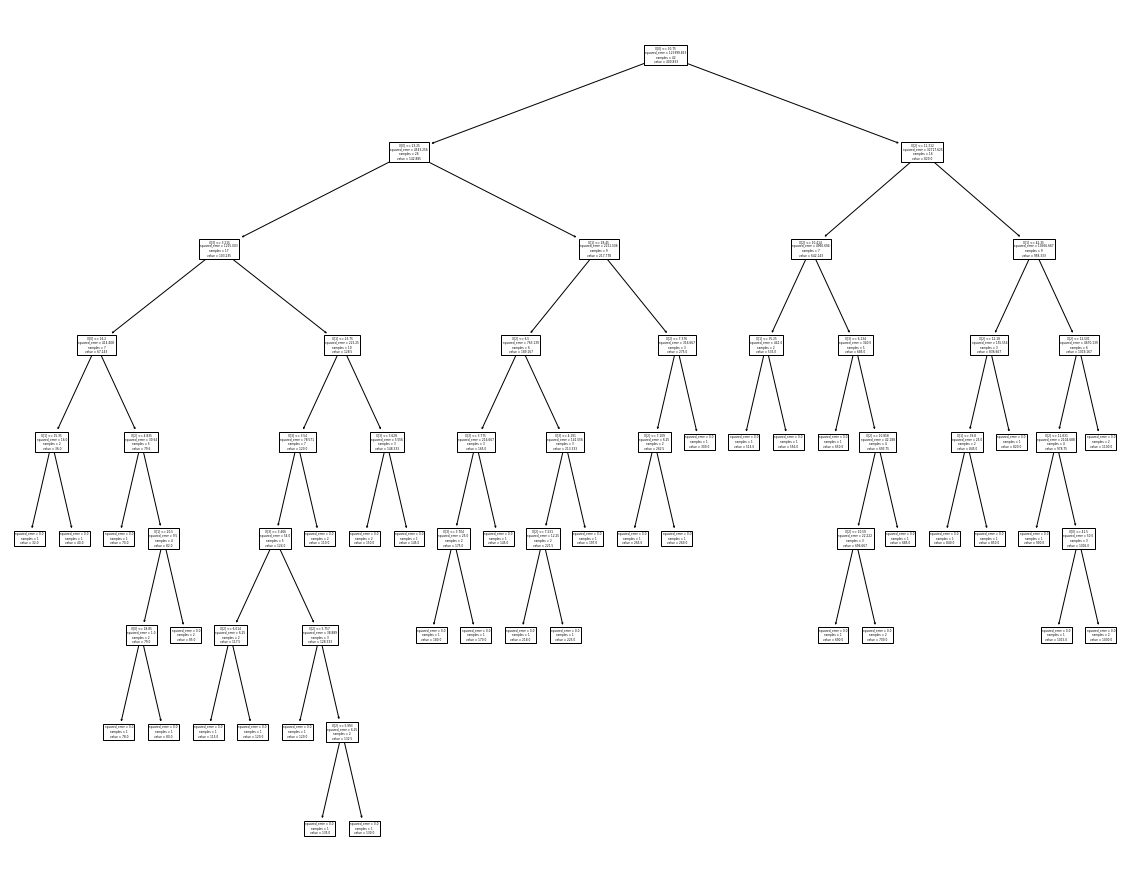

In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(tree_reg)
plt.show()

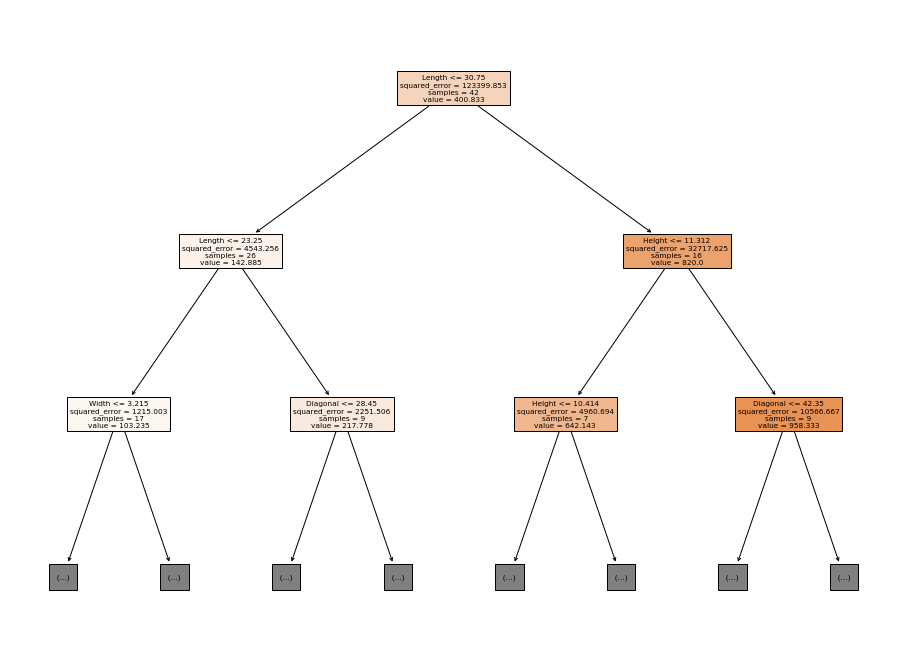

In [ ]:
plt.figure(figsize=(16, 12))
plot_tree(tree_reg, max_depth=2,
          feature_names=perch.columns[2:], filled=True)
plt.show()

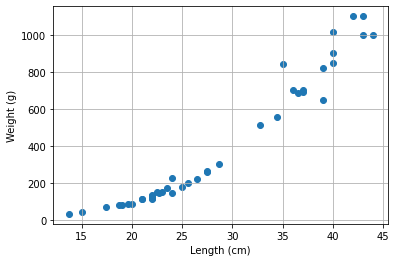

In [ ]:
# 훈련 셋의 농어 무게 ~ 길이
plt.scatter(X_tr[:, 0], y_tr)
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

In [ ]:
# 훈련 셋 예측값
tr_pred = tree_reg.predict(X_tr)
print(tr_pred[:10])
print(y_tr[:10])

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.]


In [ ]:
mean_squared_error(y_tr, tr_pred)

0.0

In [ ]:
# 테스트 셋 예측값
te_pred = tree_reg.predict(X_te)
print(te_pred[:10])
print(y_te[:10])

[ 32. 115. 260. 130. 150. 685. 300. 218. 685. 110.]
[  5.9 100.  250.  130.  130.  820.  320.  188.  900.  125. ]


In [ ]:
mean_squared_error(y_te, te_pred)

5730.2471428571425

In [ ]:
tree_reg.score(X_te, y_te)

0.9429102423287882

## cross_validate 함수를 사용한 max_depth 튜닝

In [ ]:
tr_scores = []
val_scores = []
max_depths = np.arange(1, 11)
for d in max_depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42) # CV 하기 위한 모델
    cv = cross_validate(tree, X_tr, y_tr, n_jobs=-1, return_train_score=True) # 5-fold cv
    tr_scores.append(np.mean(cv['train_score']))
    val_scores.append(np.mean(cv['test_score']))

print(tr_scores)
print(val_scores)

[0.8767922722666357, 0.9685903554980261, 0.9934290771426412, 0.998899697772964, 0.9998826458263576, 0.9999698194541387, 0.99999878447581, 1.0, 1.0, 1.0]
[0.8558949030940376, 0.9177278634402615, 0.9531203941305982, 0.9434072226786077, 0.923513957039156, 0.9655899177591556, 0.9397846070006051, 0.9070082050390672, 0.9070082050390672, 0.9070082050390672]


In [ ]:
np.argmax(val_scores) # val_scores의 최댓값의 인덱스

5

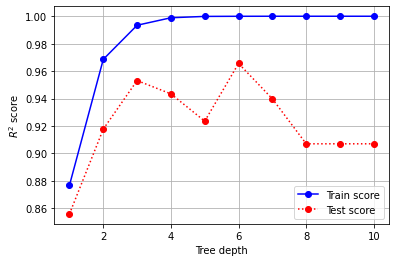

In [ ]:
plt.plot(max_depths, tr_scores, 'bo-', label='Train score')
plt.plot(max_depths, val_scores, 'ro:', label='Test score')
plt.grid()
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('$R^2$ score')
plt.show()

## GridSearchCV를 사용한 max_depth 튜닝

In [ ]:
grid_cv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                       param_grid={'max_depth' : np.arange(1, 11)},
                       n_jobs=-1)

In [ ]:
grid_cv.fit(X_tr, y_tr)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
grid_cv.best_score_

0.9655899177591556

In [ ]:
grid_cv.best_params_

{'max_depth': 6}

In [ ]:
# 일반화 성능 예측
best_tree = grid_cv.best_estimator_
best_tree.score(X_te, y_te)

0.9235971820436095

## Pipeline과 GridSearchCV

*  PolynomialFeatures, StandardScaler, LinearRegression을 Pipeline으로 연결
*  GridSearchCV를 사용해서 PolynomialFeatures의 degree를 튜닝


In [ ]:
X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((42, 4), (42,), (14, 4), (14,))

Imports

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet

In [ ]:
# 교차 검증을 할 머신 러닝 모델
model = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [ ]:
# 교차 검증에서 튜닝할 파라미터 조합
params = {'poly__degree' : np.arange(1, 6)}

In [ ]:
# Grid Search 객체 생성
grid_cv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1)

In [ ]:
grid_cv.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg', LinearRegression())]),
             n_jobs=-1, param_grid={'poly__degree': array([1, 2, 3, 4, 5])})

In [ ]:
grid_cv.best_score_

0.9313419567902571

In [ ]:
grid_cv.best_params_

{'poly__degree': 2}

In [ ]:
model2 = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', ElasticNet())])

In [ ]:
params = {'poly__degree' : np.arange(1, 10),
          'reg__alpha' : [0.1, 0.5, 1.0, 10],
          'reg__l1_ratio' : np.arange(0, 1.2, 0.2)}

In [ ]:
grid_cv2 = GridSearchCV(estimator=model2, param_grid=params, n_jobs=-1)

In [ ]:
grid_cv2.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.805e+04, tolerance: 5.183e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg', ElasticNet())]),
             n_jobs=-1,
             param_grid={'poly__degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'reg__alpha': [0.1, 0.5, 1.0, 10],
                         'reg__l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])})

In [ ]:
grid_cv2.best_score_

0.9845937514272582

In [ ]:
grid_cv2.best_params_

{'poly__degree': 4, 'reg__alpha': 1.0, 'reg__l1_ratio': 0.0}

In [ ]:
best_model = grid_cv2.best_estimator_
best_model

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()),
                ('reg', ElasticNet(l1_ratio=0.0))])

In [ ]:
best_model.score(X_te, y_te) # 일반화 성능

0.9766366793642618